<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/3O4O5_%EA%B9%80%EC%8B%9C%EA%B2%B8_2024_Mnist(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**딥러닝(Deep Learning)**
---
다양한 오픈소스 프레임워크를 이용해 딥러닝 모델을 개발할 수 있다.<br>
아래는 현재 가장 널리 사용되는 프레임워크이다.
- 구글이 개발한 [텐서플로(TensorFlow)](https://www.tensorflow.org/?hl=ko)
- 페이스북 연구팀이 개발한 [파이토치(Pytorch)](https://pytorch.org/)
- 초보자에게 적합한 [케라스(Keras)](https://keras.io/)<br>

>※ 프레임워크(Framework) <br>
응용 프로그램을 개발하기 위한 여러 라이브러리나 모듈 등을 효율적으로 사용할 수 있도록 묶어놓은 일종의 패키지를 의미

※ 출처 : 혼자 공부하는 머신러닝 + 딥러닝 (박해선)

###**케라스(Keras)**
<img src='https://drive.google.com/uc?id=1C-b7WOqh_R3HQ1ZYCFwVoUZAXp0zwnC_' width=250><br>
케라스(Keras)는 텐서플로 위에서 동작하며, 범용성이 뛰어난 대신 모델을 만들 때 밑바닥부터 모든 것을 설계해야하는 텐서플로의 단점을 보완해 훨씬 단순화된 인터페이스를 제공한다. <br>
사용자층이 넓으면서도 배우기 쉬운 프레임워크이기 때문이 우리 수업에서는 케라스를 활용하도록 하겠다.

#**✍(실습) 손글씨 인식 모델 만들기**
---
수기로 작성된 숫자를 보고 어떤 아라비아 숫자인지 판별하는 문제를 해결해보자.

<img src='https://drive.google.com/uc?id=1-OccwQ8-7fiYqsxVD8Z3BFO4psowpMGw' width=500><br>

### **MNIST 데이터 세트**

- 머신러닝에서 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터 세트는 프로그래밍의 "Hello World" 처럼 가장 기본적인 학습 예제이다.
- 여러 사람이 작성한 <font color='tomato'>0 ~ 9까지의 손글씨 숫자</font>로 구성된다.<br>
(학습 데이터 60,000개 / 테스트 데이터 10,000개)
- 1994년에 미국 고등학생과 미국 인구조사국 직원들의 손글씨 숫자를 수집하여 만들었다.
- 수집된 데이터는 회색조 이미지로 각각 <font color='tomato'>가로 28픽셀, 세로 28픽셀</font>의 사이즈 중앙에 위치하도록 전처리 되어 있다.
<br>




....................<br>
😶 이번 실습에서 해결할 문제는 회귀, 분류 중 무엇일까?





---

##**1. 데이터 가져오기**

손글씨 데이터는 케라스의 빌트인 데이터 세트로 제공된다.<br>
케라스에서 제공하는 [토이 데이터](https://keras.io/datasets/)는 넘파이 배열로 벡터화 되어있기 때문에 기초 단계에서 연습용으로 활용하기에 좋다.
- keras.datasets.mnist 모듈의 [load_data()](https://keras.io/api/datasets/mnist/#load_data-function)를 이용해 데이터를 가져올 수 있음
- load_data()는 2개의 넘파이 배열(ndarray)로 구성된 2개의 튜플을 반환함 → (x_train, y_train), (x_test, y_test)

In [ ]:
# 데이터 가져오기
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


##**2. 데이터 준비 및 분석하기**

### **2-1. 데이터 탐색**

#### ▶▶ Numpy 복습

케라스 토이 데이터는 넘파이 배열로 벡터화 되어 있다.


>```python
print(type(x_train))
print(type(y_train))
```
>```
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
```

<br>

딥러닝에서 넘파이 배열(ndarray)을 많이 사용하는 이유는 아래와 같다.
- 딥러닝 모델에서는 수많은 행렬 연산이 필요한데, 넘파이는 C로 구현되어 계산속도가 빠름
- 서로 다른 크기의 배열 간에 산술 연산이 가능한 브로드캐스팅(Broadcasting)을 지원
- 배열의 계산, 조작, 변환을 위한 다양한 함수와 메서드를 제공하여 전처리가 쉬움
- GPU 를 이용해 연산을 가속화 하기 쉬움 (OpenCL, CUDA 등의 GPU 연산 라이브러리와 쉽게 함께 사용 가능)

> <img src='https://drive.google.com/uc?id=1ZGe5JhvFZ_aKlaPkWnrGcFJgABVsMoAw' height=270>




#### ▶▶ MNIST 데이터 살펴보기

#####MNIST 데이터 세트의 형태를 확인해보자.

In [ ]:
# 데이터의 형태 확인하기
print('데이터 세트(x_train)의 형태:', x_train.shape)
print('레이블 세트(y_train)의 형태:', y_train.shape)

데이터 세트(x_train)의 형태: (60000, 28, 28)
레이블 세트(y_train)의 형태: (60000,)


In [ ]:
# 데이터의 차원 확인하기
print('데이터 세트(x_train)의 차원:', x_train.ndim)
print('레이블 세트(y_train)의 차원:', y_train.ndim)

데이터 세트(x_train)의 차원: 3
레이블 세트(y_train)의 차원: 1


#####MNIST 데이터 세트에서 샘플 데이터의 형태를 확인해보자.

In [ ]:
# 첫 번째 샘플(x_train[0]) 형태 확인하기
print('데이터(x_train[0])의 형태:',  x_train[0].shape)

데이터(x_train[0])의 형태: (28, 28)


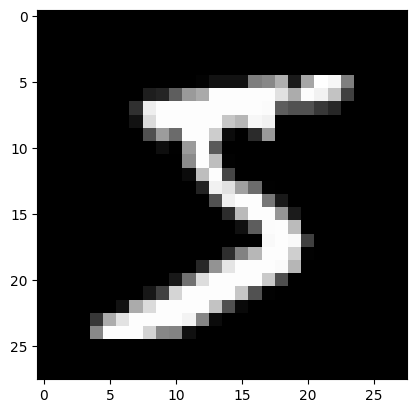

In [ ]:
# 첫 번째 샘플(x_train[0]) 이미지 출력하기
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.gray)
plt.show()

In [ ]:
# 첫 번째 샘플(x_train[0]) 넘파이 배열 값 출력하기
for i in x_train[0]:
  for j in i:
    print('%3d' %j, end='')
  print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

#####MNIST 데이터 세트에서 레이블의 형태를 확인해보자.

In [ ]:
# 첫 번째 레이블(y_train[0]) 값 출력하기
print('레이블(y_train[0])의 값:', y_train[0])

레이블(y_train[0])의 값: 5


#####MNIST 데이터 세트는 아래와 같이 구성되어 있다.

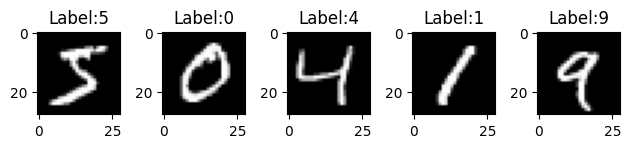

In [ ]:
# 다섯 개(0번~4번)의 데이터 샘플 이미지와 레이블 출력하기
for n in range(0, 5):
  plt.subplot(1, 5, n+1) # (columns, rows, index)
  plt.imshow(x_train[n], cmap=plt.cm.gray)
  plt.title('Label:' + str(y_train[n]))
plt.tight_layout()
plt.show()

<img src='https://drive.google.com/uc?id=161o5p1wR7JX67T7radRbxG7RuCw_JdUA' width=750>

### **2-2. 데이터 전처리**
- 데이터(x_train, x_test)를 신경망에 입력하기 적합한 형태로 변형
- 레이블(y_train, y_test)을 문제 해결에 적합한 형태로 변형

#### ▶▶ 완전연결 순방향망

이번 실습에서는 가장 기본적인 형태의 신경망을 실습한다.<br>
일반적으로 이미지 데이터에는 CNN(Convolutional Neural Network)을 많이 사용하지만,<br>
MNIST 처럼 간단한 데이터는 가장 기본적인 형태의 완전연결 순방향망으로도 충분히 좋은 성능을 보여준다.
- 완전연결층(fully-connected layer) : 이전 층의 모든 뉴런이 다음 층의 뉴런과 연결된 형태
- 순방향망(feedforward network) : 입력층에서 출력층까지 한 방향으로만 활성화되는 신경망

><img src='https://drive.google.com/uc?id=1kukz8Ap1UbO7XY5Sg1-Q4bQKClzPVs6T' width=1000>



#### ▶▶ 데이터 형태 변형
- 데이터는 입력층(Input layer)에 입력됨
- 완전연결 순방향망은 벡터(1차원)를 입력 받음

....................<br>
😶 입력층은 몇 개의 뉴런으로 구성되어야 할까?




😶 입력할 데이터의 형태와 차원은 어떻게 되는가?




In [ ]:
# 데이터 형태 변형하기
x_train = x_train.reshape((60000, 784)) # (60000, 28, 28) -> (60000, 784)
x_test = x_test.reshape((10000, 784))

#### ▶▶ 데이터 정규화
- 신경망에 너무 큰 값이 입력되면 최적의 가중치를 찾는 수렴 시간이 길어짐
- 따라서 일반적으로 입력 값을 0 ~ 1 사이의 값으로 정규화(normalize)하여 입력함<br>

※ 데이터를 정규화하지 않으면 성능에 영향을 줄 수 있다. 대부분의 신경망 구조와 옵티마이저(optimizer)는 정규화된(normalized) 데이터를 사용하도록 설계되었다.


....................<br>
😶 입력 값의 최소값과 최대값은 무엇인가?




In [ ]:
# 데이터 정규화 하기 (0~255) -> (0, 1)
x_train = x_train/255
x_test = x_test/255

#### ▶▶ 레이블 인코딩
- 분류 문제에서 레이블은 범주형 데이터임 (클래스)
- 범주형 데이터를 수치 데이터로 변환하는 것을 인코딩(Encoding)이라 함

> 인코딩 방법
- Label Encoding : 알파벳 순으로 0부터 시작해 1씩 증가하며 숫자를 매김
- Ordinal Encoding : [ 매우 아니다(0), 아니다(1), 보통이다(2), 그렇다(3), 매우 그렇다(4) ] 처럼 순서에 맞춰 숫자를 매김
- One-hot Encoding : [ 빨강(100), 초록(010), 파랑(001) ] 처럼 특정 비트 하나만 1이 되도록 숫자를 매김 <br> (클래스를 동일한 길이의 바이너리 벡터로 표현)

....................<br>
😶 MNIST 데이터 세트에서 클래스의 수는 몇 개인가?




😶 각각의 클래스를 어떻게 인코딩 하는 것이 좋을까?




In [ ]:
# 레이블 원-핫 인코딩하기
from keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

※ <u>원-핫 인코딩을 사용하는 이유</u> ※<br>
레이블을 0에서 9까지의 정수로 인코딩하면 딥러닝 모델은 레이블 "9"를 "0"보다 "8"에 더 가까운 것으로 해석할 수 있다. 원-핫 인코딩을 이용하면 각 클래스를 고유한 이진 벡터로 표현하여 클래스 간의 수치 관계 가능성을 제거하고 모델이 클래스를 더 잘 구별하도록 돕는다.

#### ▶▶ 데이터 분할
- 케라스에서 가져온 데이터가 이미 분할 되어 있기 때문에 이번 실습에서는 생략 가능함
- 특성(feature)과 레이블(label) 분리하기 : x, y로 분할되어 있음
- 학습 데이터(train)와 테스트 데이터(test) 분리하기 : *_train, *_test로 분할되어 있음

#### ▶▶ 전처리 결과 확인

In [ ]:
# 전처리 결과 확인하기
print('데이터 세트(x_train)의 형태:', x_train.shape) # (60000, 784)
print('레이블 세트(y_train)의 형태:', y_train.shape) # (60000, 10)
print('테스트 데이터 세트(x_test)의 형태:', x_test.shape)
print('테스트 레이블 세트(y_test)의 형태:', y_test.shape)

데이터 세트(x_train)의 형태: (60000, 784)
레이블 세트(y_train)의 형태: (60000, 10)
테스트 데이터 세트(x_test)의 형태: (10000, 784)
테스트 레이블 세트(y_test)의 형태: (10000, 10)


In [ ]:
# 전처리 결과 확인하기
print('x_train[0]의 형태:', x_train[0].shape) # (784,)
print('x_train[0]에 대한 레이블 형태:', y_train[0].shape) # (10,)
print('x_train[0]에 대한 레이블 값:', y_train[0]) # [0,0,0,0,0,1,0,0,0,0]

x_train[0]의 형태: (784,)
x_train[0]에 대한 레이블 형태: (10,)
x_train[0]에 대한 레이블 값: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##**3. 모델 학습시키기**

### **3-1. 신경망 모델 생성**
필요한 형태와 타입의 층을 쌓아 아래와 같은 설계의 신경망을 생성해보자.
- 총 3개의 층으로 구성 (입력층-은닉층-출력층)

※ 참고링크 : https://keras.io/ko/getting-started/sequential-model-guide/
><img src='https://drive.google.com/uc?id=1PBpCiE0flje7zTg0GdPv34FD0XX4Y9In' width=400>


#### ▶▶ 신경망 객체 생성
- 신경망 모델([tf.keras.models.Sequential](https://keras.io/api/models/sequential/)) 객체 생성하기
- 순방향망을 만드는 가장 쉬운 방법은 Sequential 클래스를 이용하는 것임

※ Sequential 클래스는 최소한의 코드로 심층 신경망을 빌드할 수 있는 하이레벨 신경망 API이다.

In [ ]:
# 신경망 모델 생성하기
from keras import models
model = models.Sequential() # 신경망 객체 생성

#### ▶▶ 신경망 층 쌓기
- 케라스에서는 add() 메서드를 이용해 모델의 층을 쉽게 추가할 수 있음
- 데이터와 해결할 문제의 성격에 따라 적절한 타입의 층을 선택하는 것이 중요함
- 이번 실습에서는 완전연결 순방향망을 구현하는 것이 목표이므로 [Dense](https://keras.io/api/layers/core_layers/dense/) 층을 선택

※ 완전연결층(fully-connected layer)과 밀집층(dense layer)은 서로 같은 의미이다.<br>
※ 이외에도 CNN 구축을 위한 Convolution Layer, Pooling Layer, RNN 구축을 위한 Recurrent Layer 등 다양한 층을 지원한다.

>층을 만들 때는 출력의 개수, 입력의 형태, 활성화 함수 등을 지정해준다.
```
tf.keras.layers.Dense(units, input_shape, activation, ...)
```
- units : 출력의 개수
- input_shape : 입력 데이터의 형태
- activation : 활성화 함수

>활성화 함수(activation function) 종류
>- [Sigmoid](https://gooopy.tistory.com/52?category=824281) : 퍼셉트론의 계단 함수 대신 사용하는 가장 기본적인 활성화 함수
>- [ReLu](https://gooopy.tistory.com/55) : 신경망의 은닉층에서 무난하게 많이 사용되는 함수
>- [Softmax](https://gooopy.tistory.com/53) : 다중분류 문제의 출력층에서 사용되는 함수 <font color='tomato'>(소프트맥수 출력 값음 각 클래스에 속할 확률을 의미함)</font>
>- 케라스에서 지원하는 활성화 함수 종류 : https://keras.io/api/layers/activations/

In [ ]:
# 신경망 모델에 은닉층, 출력층 추가하기
from keras import layers
model.add(layers.Input(shape=(784,))) # 입력층 add(층) input(형태)
model.add(layers.Dense(64, activation='sigmoid')) # 은닉층 Dense(노드갯수, 활성화 함수)
model.add(layers.Dense(10, activation='softmax')) # 출력층

#### ▶▶ 학습 방식 설정하기
- 모델을 학습시키기 전에 compile() 메서드를 이용해 학습 방식에 대한 환경을 설정해야 함

※ 참고링크 : https://keras.io/api/models/model_training_apis/


> 컴파일 과정에서 아래 세 가지를 설정할 수 있다.
```
compile(optimizer, loss, metrics)
```
- 옵티마이저(optimizer) : 손실이 최소가 되는 가중치와 편향을 구하는 최적화 알고리즘 (Ex.'SGD'(확률적 경사하강법))
- 손실함수(loss) : 손실을 계산하는 방법 (Ex. 'categorical_crossentropy'(범주형 교차 엔트로피))
- 평가지표(metrics) : 학습 또는 테스트 중에 모델의 성능을 모니터링하기 위한 성능 지표(Ex. 'accuracy'(정확도))<br>


In [ ]:
# 학습 방식 설정하기
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

#### ▶▶ 신경망 정보 확인하기
- summary() 메서드를 이용해 구축한 신경망의 정보를 확인할 수 있음

In [ ]:
# 요약정보 확인하기
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

....................<br>
😶 각 층의 매개변수 개수(Param #)는 어떻게 계산되었을까?




### **3-2. 신경망 모델 학습**
신경망을 구축하고 학습 방법을 설정했다면 fit() 메서드를 이용해 신경망을 학습 시킬 수 있다.

※ 참고링크 : https://keras.io/api/models/model_training_apis/


> 학습은 아래와 같이 시킬 수 있다.
```
fit(x, y, epochs, batch_size, verbose, ...)
```
- epochs : 모델의 학습 횟수
- batch_size : 매개변수를 업데이트하기 위해 사용되는 샘플의 개수
- verbose : 로그를 표시할지 여부


In [ ]:
# 모델 학습 시키기
model.fit(x_train, y_train, epochs=30, batch_size=128)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3457 - loss: 2.2142
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6999 - loss: 1.6962
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7676 - loss: 1.3418
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8003 - loss: 1.0938
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8174 - loss: 0.9344
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8311 - loss: 0.8188
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8451 - loss: 0.7308
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8525 - loss: 0.6710
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8565 - loss: 0.6307
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.5864
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.5538
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

##**4. 모델 평가하기**

학습이 완료되면 evaluate() 메서드를 이용해 테스트 데이터로 성능을 측청한다.
- evaluate()는 compile()에서 설정한 손실값과 평가지표값을 반환함
- 따라서 여기서는 loss(범주형 교차 엔트로피)와 accuracy(정확도)를 반환함

※참고링크 : https://keras.io/api/models/model_training_apis/

In [ ]:
# 모델 평가하기
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값 :', test_loss, '테스트 정확도 :', test_acc)

테스트 손실값 : 0.337105393409729 테스트 정확도 : 0.9085000157356262


##**5. 모델 활용하기**

predict() 메서드를 이용해 새로운 데이터를 분류할 수 있다.

※참고링크 : https://keras.io/api/models/model_training_apis/

#####테스트 샘플을 이용해 신경망의 판단을 확인해보자.

- 신경망 모델은 784픽셀 데이터를 여러개 입력 받아 10개의 확률 값을 여러개 출력한다.
- fit(), evaluate()와 마찬가지로 predict()에 데이터를 넘기고 결과를 반환 받을 때는 데이터의 형태를 잘 맞춰준다.
 - x_test[n].reshape(1, 784) : 입력할 데이터는 (1, 784)의 이차원 형태로 맞춰야 함
 - argmax(axis=-1) : 매트릭스에서 벡터 내 최대 값을 가지는 인덱스를 구함

아래의 숫자는 [1] 입니다.
실제 답은 1 입니다.



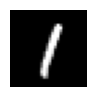

In [ ]:
# 테스트 샘플 분류 결과 확인하기
n = 5 # 테스트할 샘플 번호
y_prob = model.predict(x_test[n].reshape(1, 784), verbose=0) # 출력층의 출력 벡터 (각 클래스의 확률값)
y_pred = y_prob.argmax(axis=-1) # 출력 벡터 중 확률 값이 가장 높은 클래스
print('아래의 숫자는', y_pred, '입니다.')
print('실제 답은', y_test[n].tolist().index(1), '입니다.\n')
# 테스트 샘플 이미지 출력하기
plt.figure(figsize = (1, 1))
plt.axis('off')
#plt.rcParams['savefig.pad_inches'] = 0
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.gray)
plt.show()

....................<br>
😶 신경망이 정답을 잘 맞추지 못한 경우를 찾아보자.




#####새로운 손글씨가 무슨 숫자인지 맞춰보도록 해보자.

- 그림판에서 28 * 28 픽셀 글씨를 적어 testdata.png로 저장하고 업로드하기

In [ ]:
# 파일 업로드하기
from google.colab import files
uploaded = files.upload()

Saving six.png to six (1).png


- 그림판으로 그린 이미지는 RGB를 이용하기 때문에 데이터의 형태는 (3, 28, 28)
- 따라서 원본 이미지를 회색조로 변화하여 형태를 (28, 28)로 MNIST와 같게 해줘야 함


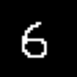

In [ ]:
# 이미지를 회색조로 변환하기
import cv2
test = cv2.imread('six.png')
test = cv2.cvtColor(test, cv2.COLOR_RGB2GRAY)
# 이미지 출력하기
plt.figure(figsize = (1, 1))
plt.axis('off')
plt.rcParams['savefig.pad_inches'] = 0
plt.imshow(test, cmap=plt.cm.gray)
plt.show()

- 분류 결과 확인시 데이터의 형태를 2차원으로 변형해야 함

In [ ]:
# 분류 결과 확인하기
test = test.astype('float32') / 255
test = test.reshape(1, 28 * 28)
y_prob = model.predict(test, verbose=0)
y_pred = y_prob.argmax(axis=-1)
print('이 숫자는', y_pred, '입니다.')

이 숫자는 [6] 입니다.


##**[+] 성능 개선하기**
신경망의 구조를 변경하면 모델의 성능이 달라질 수 있다.


- 은닉층의 활성화 함수를 ReLU로 변경해보자.
```python
import keras
model_a = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
```

- 은닉층의 뉴런 수를 512개로 변경해보자.
```python
import keras
model_b = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
```

- 은닉층을 하나 더 추가해보자.
```python
import keras
model_c = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
```



